In [51]:
import pandas as pd
import numpy as np


In [52]:
df = pd.read_csv('customdata/network.csv')
df['label'].unique()
df['type'].unique()

array(['backdoor', 'ddos', 'dos', 'injection', 'mitm', 'normal',
       'password', 'ransomware', 'scanning', 'xss'], dtype=object)

In [53]:
# print nums and cols
print(df.shape)
print(df.columns)

(211043, 44)
Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')


In [54]:
# print unique vals in label
df['label'].unique()
df['type'].unique()

array(['backdoor', 'ddos', 'dos', 'injection', 'mitm', 'normal',
       'password', 'ransomware', 'scanning', 'xss'], dtype=object)

In [55]:
# unique vals in src_ip and how many there are of each
print(df['src_ip'].value_counts())

# total unique values in src_ip
print(df['src_ip'].nunique())

192.168.1.30                               61633
192.168.1.31                               30355
192.168.1.32                               27227
192.168.1.193                              25000
192.168.1.152                              21893
192.168.1.33                                9439
192.168.1.37                                7500
192.168.1.195                               4208
192.168.1.180                               3708
192.168.1.190                               3179
192.168.1.194                               1666
192.168.1.184                               1643
172.17.0.5                                  1562
2405:6e00:10ce:2c00:20c:29ff:feee:e07a      1465
192.168.1.79                                1408
172.17.0.7                                  1260
192.168.1.133                                782
192.168.1.250                                740
192.168.1.39                                 692
172.17.0.8                                   647
192.168.1.6         

In [56]:
# unique vals in src_ip and how many there are of each
print(df['dst_ip'].value_counts())

# total unique values in src_ip
print(df['dst_ip'].nunique())

192.168.1.190             47795
192.168.1.193             23790
192.168.1.152             22701
192.168.1.195             13524
192.168.1.184             12528
                          ...  
205.251.195.213               1
192.12.94.30                  1
205.251.199.172               1
205.251.193.162               1
2600:9000:5302:a100::1        1
Name: dst_ip, Length: 753, dtype: int64
753


In [57]:
# unique vals in src_ip and how many there are of each
print(df['src_port'].value_counts())

# total unique values in src_ip
print(df['src_port'].nunique())

80       3643
5353     3505
1880     3449
34296    3362
4444     2152
         ... 
18305       1
17651       1
17360       1
17189       1
46419       1
Name: src_port, Length: 26628, dtype: int64
26628


In [58]:
# unique vals in src_ip and how many there are of each
print(df['dst_port'].value_counts())

# total unique values in src_ip
print(df['dst_port'].nunique())

80       70673
53       34589
445      13449
8080     10329
443       7587
         ...  
42210        1
49917        1
49918        1
49919        1
49500        1
Name: dst_port, Length: 2039, dtype: int64
2039


In [59]:
# find na in first 4 cols
print(df[['src_ip', 'dst_ip', 'src_port', 'dst_port']].isna().sum())

src_ip      0
dst_ip      0
src_port    0
dst_port    0
dtype: int64


In [60]:
# concatentate the src_ip and the src_port, then the dst_ip and dst_port
df['src_ip_port'] = df['src_ip'] + ':' + df['src_port'].astype(str)
df['dst_ip_port'] = df['dst_ip'] + ':' + df['dst_port'].astype(str)

In [61]:
df.columns

print(df['type'].unique())


['backdoor' 'ddos' 'dos' 'injection' 'mitm' 'normal' 'password'
 'ransomware' 'scanning' 'xss']


In [62]:
print(df['src_ip_port'].nunique())
print(df['dst_ip_port'].nunique())

66678
11908


In [63]:
df1 = df[df['type'].isin(['dos', 'normal'])]
print(df1['src_ip_port'].nunique())
print(df1['dst_ip_port'].nunique())
print("df1:", df1.shape, "\n")

df2 = df[df['type'].isin(['ddos', 'normal'])]
print(df2['src_ip_port'].nunique())
print(df2['dst_ip_port'].nunique())
print("df2:", df2.shape)

df = df2

df.shape

25269
6807
df1: (70000, 46) 

39806
5990
df2: (70000, 46)


(70000, 46)

In [64]:
# drop the nonnumberical characters in the src_ip_port and dst_ip_port
df['src_ip_port'] = df['src_ip_port'].str.replace(r'\D', '')
df['dst_ip_port'] = df['dst_ip_port'].str.replace(r'\D', '')

C:\Users\xiaog\AppData\Local\Temp\ipykernel_32160\1609719670.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['src_ip_port'] = df['src_ip_port'].str.replace(r'\D', '')
C:\Users\xiaog\AppData\Local\Temp\ipykernel_32160\1609719670.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['dst_ip_port'] = df['dst_ip_port'].str.replace(r'\D', '')


In [65]:
print(df['src_ip_port'].nunique())
print(df['src_ip_port'].value_counts(), "\n")

print(df['dst_ip_port'].nunique())
print(df['dst_ip_port'].value_counts())

39806
19216811521880     3445
192168115234296    3355
19216811848080     1641
192168119480       1641
192168119380       1641
                   ... 
19216813138573        1
19216813138462        1
19216813138460        1
19216813138458        1
19216811522014        1
Name: src_ip_port, Length: 39806, dtype: int64 

5979
192168119053       20962
1921681184443       6318
192168119080        6095
1921681153          5270
192168115251782     3363
                   ...  
199195313              1
19256303               1
1924293303             1
192541123053           1
19216811842014         1
Name: dst_ip_port, Length: 5979, dtype: int64


In [73]:
df.shape

(70000, 46)

In [66]:
# unique values in src_ip_port and dst_ip_port 
s1 = (df['src_ip_port'].unique())
d1 = (df['dst_ip_port'].unique())

# similarity between src_ip_port and dst_ip_port
similarity = np.intersect1d(s1, d1)

print(similarity, len(similarity))

['1921681141952' '1921681149152' '192168115210502' ... '19216813042206'
 '19216813042208' '19216813042210'] 2757


In [67]:
# only keep 2760 that serve as both src and dst
df1 = df[df['src_ip_port'].isin(similarity)]
df1 = df[df['dst_ip_port'].isin(similarity)]

In [68]:
print(df1.shape)

(13517, 46)


In [80]:
# get rid of rows that have the same src_ip_port and dst_ip_port
df2 = df1[df1['src_ip_port'] != df1['dst_ip_port']]

# unique values in src_ip_port and dst_ip_port 
s2 = (df2['src_ip_port'].unique())
d2 = (df2['dst_ip_port'].unique())

# similarity between src_ip_port and dst_ip_port
similarity = np.intersect1d(s2, d2)

print(similarity, len(similarity))

['1921681141952' '1921681149152' '192168115210502' '19216811521880'
 '192168115234296' '192168115235106' '192168115251782' '192168115253784'
 '192168115253794' '192168115253798' '192168119057575' '192168119057579'
 '192168119057580' '192168119057581' '192168119057582' '192168119057583'
 '192168119057584' '192168119057587' '192168119057592' '192168119057593'
 '192168119057594' '192168119057595' '192168119057596' '192168119057614'
 '192168119057615' '192168119057616' '192168119057617' '192168119057618'
 '192168119057619' '192168119057620' '192168119057621' '192168119057623'
 '192168119057624' '192168119057625' '192168119057626' '192168119057628'
 '192168119240565' '192168119240566' '192168119240567' '192168119240568'
 '192168119240569' '192168119240570' '192168119240571' '192168119349179'
 '192168119349180' '192168119349182' '192168119549917' '192168119549918'
 '192168119549919' '192168119549930' '192168119549934' '192168119549935'
 '192168119549936' '192168119549937' '192168119551562' '

In [81]:
print(df2.shape)
df = df2
df.head()


(8595, 46)


src_ip  src_port         dst_ip  dst_port proto service  \
26113  192.168.1.30     45678  192.168.1.194        80   tcp    http   
26114  192.168.1.30     45690  192.168.1.194        80   tcp    http   
26518  192.168.1.30     45692  192.168.1.194        80   tcp    http   
26519  192.168.1.30     45694  192.168.1.194        80   tcp    http   
26520  192.168.1.30     45700  192.168.1.194        80   tcp    http   

        duration  src_bytes  dst_bytes conn_state  ...  http_user_agent  \
26113   0.089880        204       1124         SF  ...                -   
26114  15.284506        205       1124         S3  ...                -   
26518   0.166103        172       1124         SF  ...                -   
26519  15.372010        213       1124         S3  ...                -   
26520  15.216300        204       1124         S3  ...                -   

       http_orig_mime_types  http_resp_mime_types  weird_name  weird_addl  \
26113                     -                     -           -           -   
26114                     -                     -           -           -   
26518                     -                     -           -           -   
26519                     -                     -           -           -   
26520                     -                     -           -           -   

      weird_notice  label  type     src_ip_port   dst_ip_port  
26113            -      1  ddos  19216813045678  192168119480  
26114            -      1  ddos  19216813045690  192168119480  
26518            -      1  ddos  19216813045692  192168119480  
26519            -      1  ddos  19216813045694  192168119480  
26520            -      1  ddos  19216813045700  192168119480  

[5 rows x 46 columns]

In [95]:
print(df['src_ip_port'].value_counts())
print(df[df['src_ip_port'] == '192168115251782'].shape)

19216811521880     3442
192168115234296    3353
1921681156504        86
192168115210502      16
1921681149152         5
                   ... 
19216813056626        1
19216813056594        1
19216813056590        1
19216813056588        1
1921681152489         1
Name: src_ip_port, Length: 1534, dtype: int64
(2, 46)


In [93]:
print(df['dst_ip_port'].value_counts())

# number of 192168115234296    
print(df[df['dst_ip_port'] == '192168115234296'].shape)

192168115251782    3363
192168115210502    3353
192168119480        833
1921681141952       364
19216811521880      201
                   ... 
19216813042166        1
19216813042180        1
19216813042182        1
19216813042184        1
192168119057620       1
Name: dst_ip_port, Length: 176, dtype: int64
(16, 46)


In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import networkx as nx

In [83]:
df.tail()

src_ip  src_port         dst_ip  dst_port proto service  \
130900  192.168.1.195     52203    192.168.1.1     41952   tcp    http   
130906  192.168.1.195     52204    192.168.1.1     49152   tcp    http   
130907  192.168.1.195     52205    192.168.1.1     41952   tcp    http   
130908  192.168.1.195     52206    192.168.1.1     41952   tcp    http   
130912    192.168.1.1     52489  192.168.1.195     60899   udp       -   

        duration  src_bytes  dst_bytes conn_state  ...  http_user_agent  \
130900  0.525861        383       3882         SF  ...                -   
130906  0.006901        191        991         SF  ...                -   
130907  0.015802        226       3978         SF  ...                -   
130908  0.025968        226       3978         SF  ...                -   
130912  0.000503        573          0         S0  ...                -   

        http_orig_mime_types  http_resp_mime_types  weird_name  weird_addl  \
130900                     -                     -           -           -   
130906                     -                     -           -           -   
130907                     -                     -           -           -   
130908                     -                     -           -           -   
130912                     -                     -           -           -   

       weird_notice  label    type      src_ip_port      dst_ip_port  
130900            -      0  normal  192168119552203    1921681141952  
130906            -      0  normal  192168119552204    1921681149152  
130907            -      0  normal  192168119552205    1921681141952  
130908            -      0  normal  192168119552206    1921681141952  
130912            -      0  normal    1921681152489  192168119560899  

[5 rows x 46 columns]

In [85]:
sources = df['src_ip_port'].values.tolist()
destinations = df['dst_ip_port'].values.tolist()   

print(len(sources), len(destinations))

# all values into integers
sources = [int(i) for i in sources]
destinations = [int(i) for i in destinations]

print(type(sources[0])) 

8595 8595
<class 'int'>


In [86]:
# taken from graphtest1/graphingpractice.ipynp
edge_index = torch.tensor([sources, destinations], dtype=torch.long)

Data(edge_index=[2, 8595], num_nodes=86)


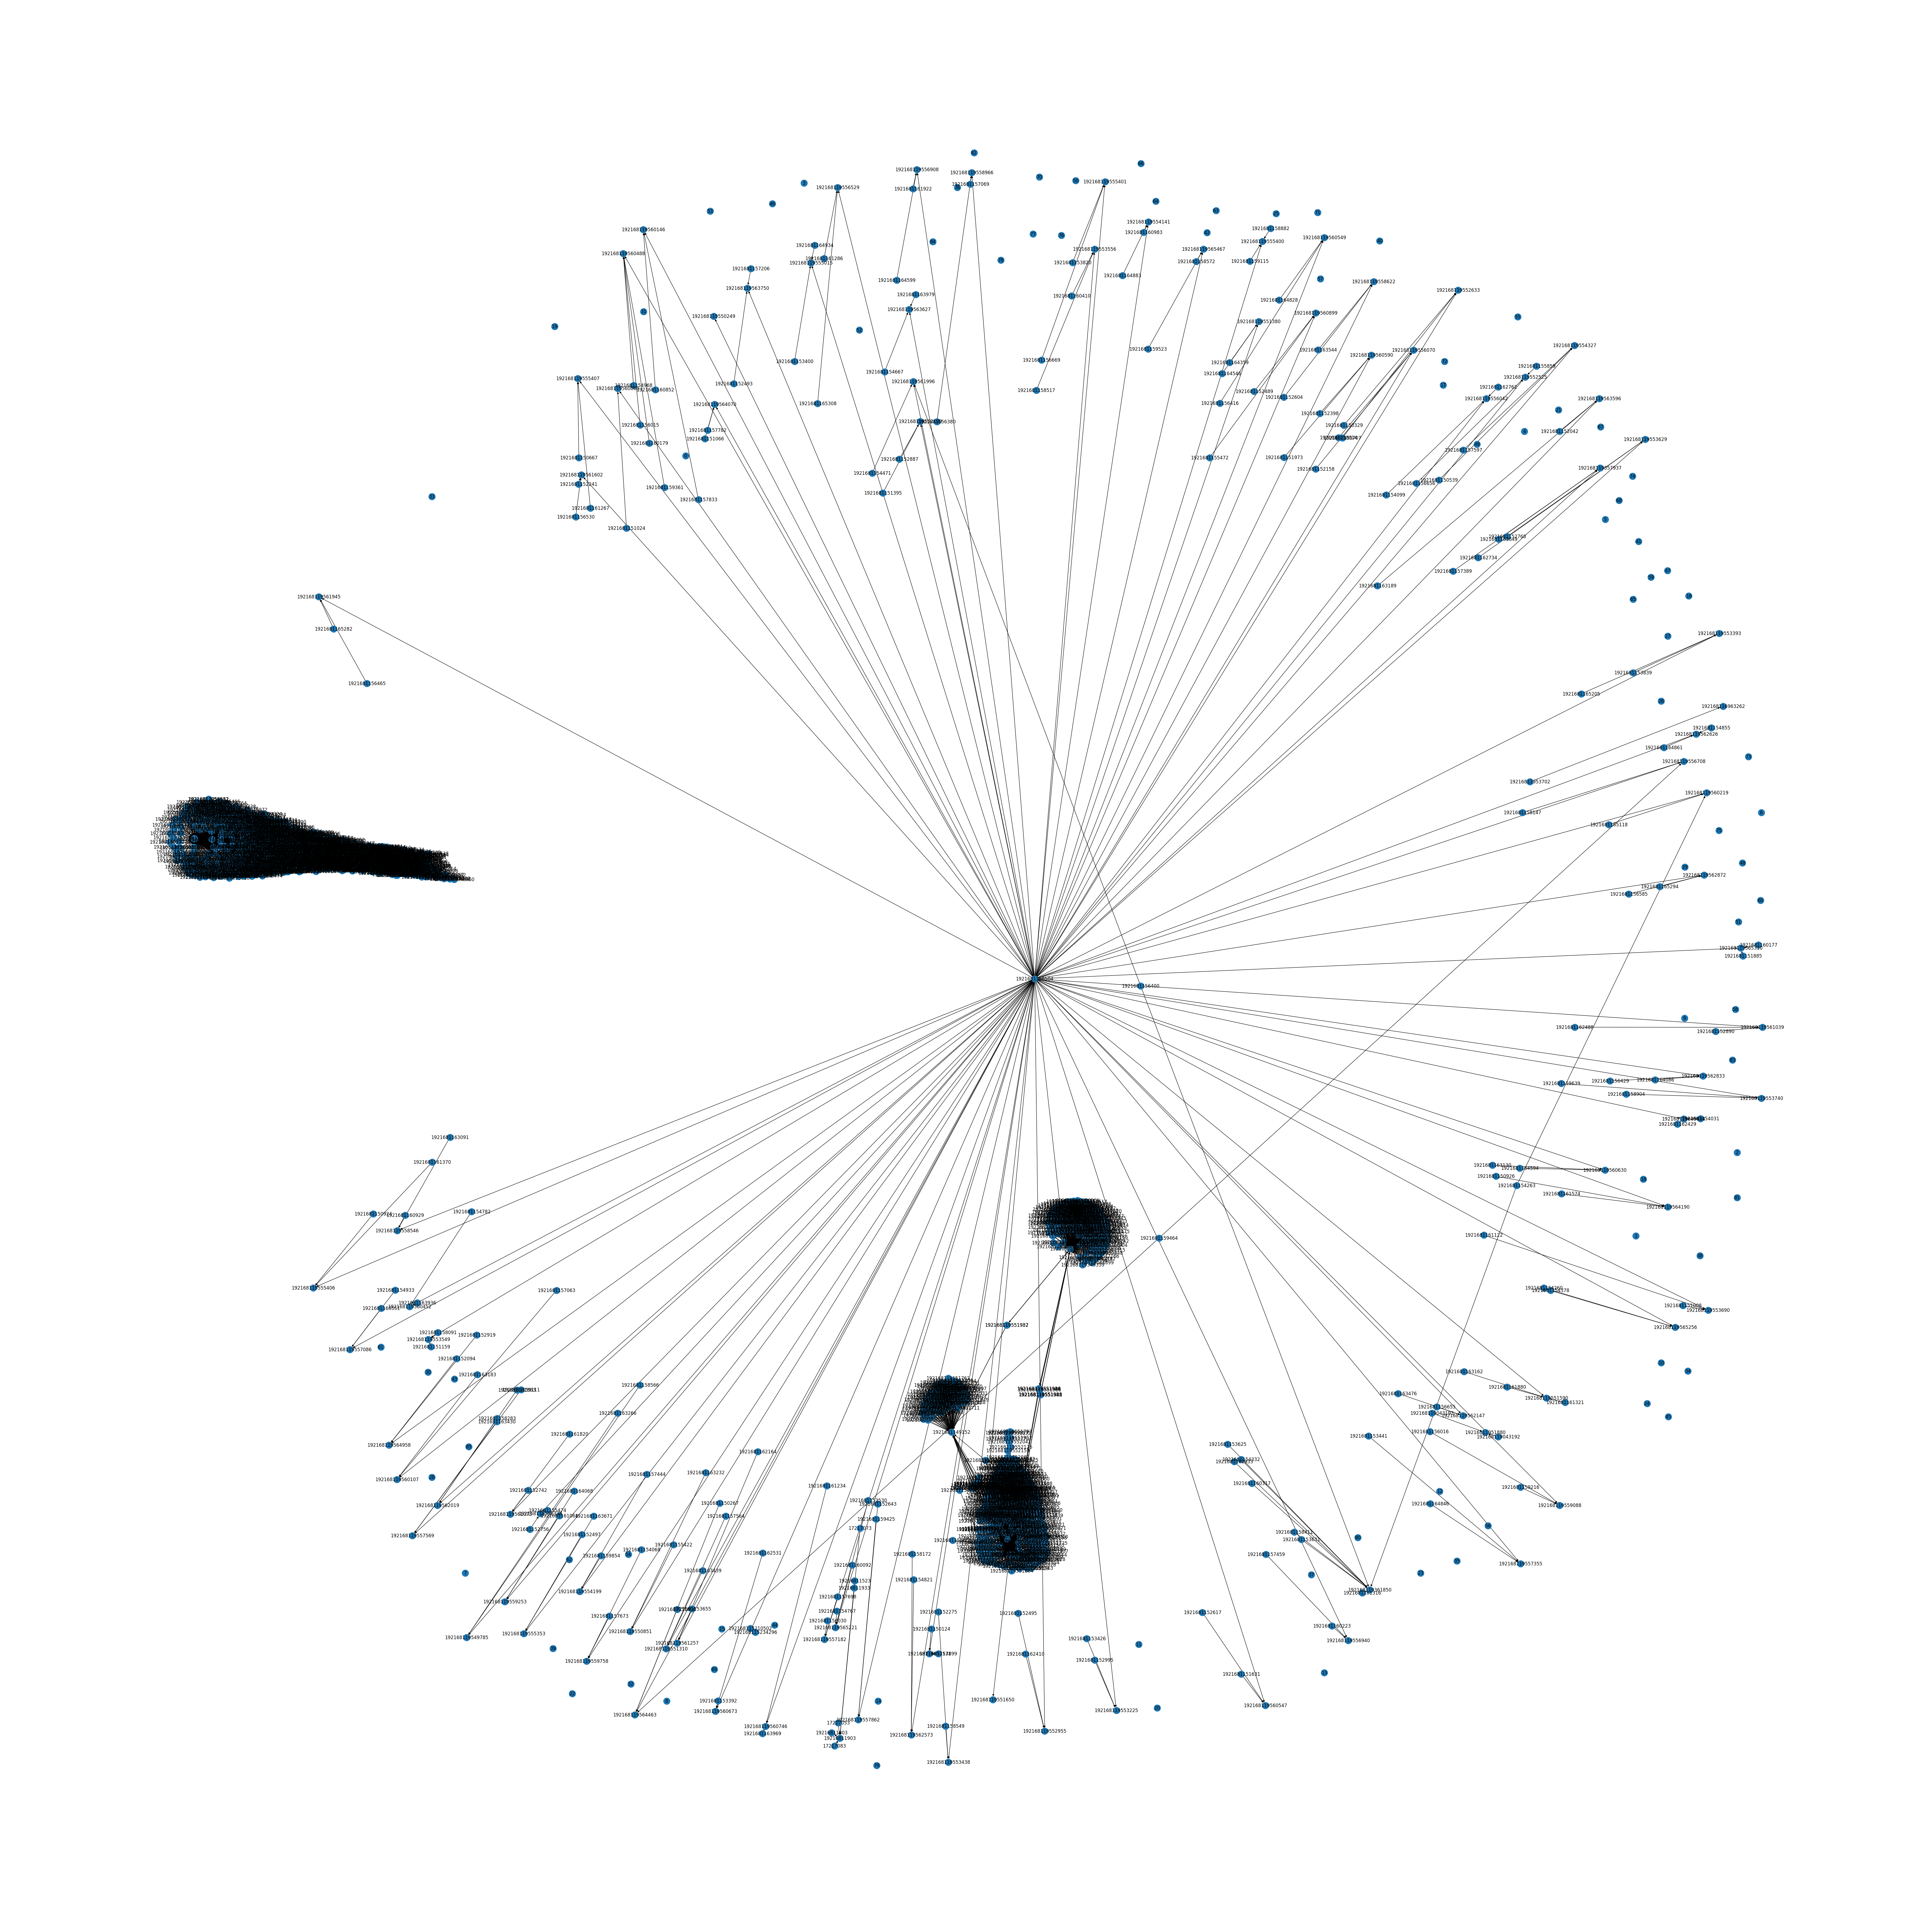

In [88]:
# display graph as image

data = Data(edge_index=edge_index, num_nodes=86)
print(data)

plt.figure(figsize=(70,70))
nxg = to_networkx(data)
pos = nx.spring_layout(nxg)
nx.draw(nxg, pos, with_labels=True)
plt.show()
